In [1]:
#!pip install apyori
#!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
path = "Dados/MicroDados2019Teresina.csv"

In [4]:
dadosEnem = pd.read_csv(path,sep=';',encoding='latin1',low_memory=False)

dadosEnem

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001095296,2112209,21,17,M,1,3,2,NaN,NaN,...,A,A,A,B,A,A,B,A,A,A
1,190001095696,2211001,22,16,M,1,3,1,2112209.0,Timon,...,B,A,A,B,B,A,D,A,A,A
2,190001095731,2112209,21,18,F,1,3,1,2211001.0,Teresina,...,A,A,A,B,B,A,C,A,B,B
3,190001095751,2112209,21,19,M,1,3,1,3526902.0,Limeira,...,B,A,B,B,A,A,D,A,A,B
4,190001095932,2211001,22,38,F,1,0,1,2211001.0,Teresina,...,A,A,A,B,A,A,C,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8087,190006118415,2211001,22,18,M,1,3,1,2211001.0,Teresina,...,B,A,A,B,A,B,E,A,B,B
8088,190006119693,2211001,22,17,F,1,3,1,2211001.0,Teresina,...,A,A,A,B,A,A,C,A,A,A
8089,190006119702,2211001,22,18,F,1,3,1,2103000.0,Caxias,...,A,A,A,B,B,A,C,A,A,A
8090,190006119724,2211001,22,17,F,1,2,1,2211001.0,Teresina,...,B,A,A,B,A,A,C,A,A,B


In [5]:
dadosEnem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8092 entries, 0 to 8091
Data columns (total 71 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NU_INSCRICAO             8092 non-null   int64  
 1   CO_MUNICIPIO_RESIDENCIA  8092 non-null   int64  
 2   CO_UF_RESIDENCIA         8092 non-null   int64  
 3   NU_IDADE                 8092 non-null   int64  
 4   TP_SEXO                  8092 non-null   object 
 5   TP_ESTADO_CIVIL          8092 non-null   int64  
 6   TP_COR_RACA              8092 non-null   int64  
 7   TP_NACIONALIDADE         8092 non-null   int64  
 8   CO_MUNICIPIO_NASCIMENTO  7761 non-null   float64
 9   NO_MUNICIPIO_NASCIMENTO  7761 non-null   object 
 10  CO_UF_NASCIMENTO         7761 non-null   float64
 11  SG_UF_NASCIMENTO         7761 non-null   object 
 12  TP_ST_CONCLUSAO          8092 non-null   int64  
 13  TP_ANO_CONCLUIU          8092 non-null   int64  
 14  TP_ESCOLA               

#Colunas a serem retiradas
* SG_UF_NASCIMENTO (valor duplicado)
* TP_Nacionalidade
* TP_Estado_Civil
* SG_UF_ESC
* SG_UF_PROVA
* CO_MUNICIPIO_PROVA (nesta base, as outras referências aos municipios foram feitas por nome)

O que mais foi feito:
* Retirada dos valores nan e várias colunas
* Tratamento de dados
* Tentativa de rodar o apriori


In [6]:
dadosEnem = dadosEnem.drop(['SG_UF_NASCIMENTO' ], axis=1)
dadosEnem = dadosEnem.drop(['TP_NACIONALIDADE' ], axis=1)
dadosEnem = dadosEnem.drop(['TP_ESTADO_CIVIL' ], axis=1)
#dadosEnem = dadosEnem.drop(['SG_UF_ESC'], axis=1)
dadosEnem = dadosEnem.drop(['CO_MUNICIPIO_ESC_x'], axis=1)
dadosEnem = dadosEnem.drop(['CO_MUNICIPIO_ESC_y'], axis=1)
dadosEnem = dadosEnem.drop(['SG_UF_PROVA'], axis=1)
dadosEnem = dadosEnem.drop(['CO_MUNICIPIO_PROVA'], axis=1)
dadosEnem = dadosEnem.drop(['TP_PRESENCA_CN'], axis=1)
dadosEnem = dadosEnem.drop(['TP_PRESENCA_CH'], axis=1)
dadosEnem = dadosEnem.drop(['TP_PRESENCA_LC'], axis=1)
dadosEnem = dadosEnem.drop(['TP_PRESENCA_MT'], axis=1)














## É necessário mudar o tipo de algumas colunas, já que li todas as colunas como tipo categoria

# Tratando dados faltantes

TP_ENSINO , TP_SIT_FUNC_ESC

In [7]:
dadosEnem['TP_ENSINO'].fillna(0,inplace=True)
dadosEnem['TP_SIT_FUNC_ESC'].fillna(0,inplace=True)
dadosEnem['NO_MUNICIPIO_NASCIMENTO'].fillna("Não Informado",inplace=True)
dadosEnem['CO_UF_NASCIMENTO'].fillna('00',inplace=True)

#Para calcular a idade de campos Nan vou usar a técninca de dubstituir os campos pela média dos valores da coluna

In [8]:

dadosEnem['NU_IDADE'].fillna(dadosEnem['NU_IDADE'].mean(),inplace=True)

In [9]:
dadosEnem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8092 entries, 0 to 8091
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NU_INSCRICAO             8092 non-null   int64  
 1   CO_MUNICIPIO_RESIDENCIA  8092 non-null   int64  
 2   CO_UF_RESIDENCIA         8092 non-null   int64  
 3   NU_IDADE                 8092 non-null   int64  
 4   TP_SEXO                  8092 non-null   object 
 5   TP_COR_RACA              8092 non-null   int64  
 6   CO_MUNICIPIO_NASCIMENTO  7761 non-null   float64
 7   NO_MUNICIPIO_NASCIMENTO  8092 non-null   object 
 8   CO_UF_NASCIMENTO         8092 non-null   object 
 9   TP_ST_CONCLUSAO          8092 non-null   int64  
 10  TP_ANO_CONCLUIU          8092 non-null   int64  
 11  TP_ESCOLA                8092 non-null   int64  
 12  TP_ENSINO                8092 non-null   float64
 13  IN_TREINEIRO             8092 non-null   int64  
 14  CO_ESCOLA               

#Problema: As Notas tem muitos campos sem valor, devido a ausência de alunos nas provas. Substituir todos os valores por 0 pode colocoar viés na base.

Valores relacionados a média ficariam distorcidos.

A solução que irei tomar é remover essas linhas com notas faltantes da minha base tratada. Caso voltemos atŕas é só descomentar e executar a célula abaixo que substitui as notas "vazias" por 0.

In [10]:
''' dadosEnem['NU_NOTA_CN'].fillna(0,inplace=True)
dadosEnem['NU_NOTA_CH'].fillna(0,inplace=True)
dadosEnem['NU_NOTA_LC'].fillna(0,inplace=True)
dadosEnem['NU_NOTA_MT'].fillna(0,inplace=True)
dadosEnem['TP_STATUS_REDACAO'].fillna(0,inplace=True)
dadosEnem['NU_NOTA_COMP1'].fillna(0,inplace=True)
dadosEnem['NU_NOTA_COMP2'].fillna(0,inplace=True)
dadosEnem['NU_NOTA_COMP3'].fillna(0,inplace=True)
dadosEnem['NU_NOTA_COMP4'].fillna(0,inplace=True)
dadosEnem['NU_NOTA_COMP5'].fillna(0,inplace=True)
dadosEnem['NU_NOTA_REDACAO'].fillna(0,inplace=True) '''

" dadosEnem['NU_NOTA_CN'].fillna(0,inplace=True)\ndadosEnem['NU_NOTA_CH'].fillna(0,inplace=True)\ndadosEnem['NU_NOTA_LC'].fillna(0,inplace=True)\ndadosEnem['NU_NOTA_MT'].fillna(0,inplace=True)\ndadosEnem['TP_STATUS_REDACAO'].fillna(0,inplace=True)\ndadosEnem['NU_NOTA_COMP1'].fillna(0,inplace=True)\ndadosEnem['NU_NOTA_COMP2'].fillna(0,inplace=True)\ndadosEnem['NU_NOTA_COMP3'].fillna(0,inplace=True)\ndadosEnem['NU_NOTA_COMP4'].fillna(0,inplace=True)\ndadosEnem['NU_NOTA_COMP5'].fillna(0,inplace=True)\ndadosEnem['NU_NOTA_REDACAO'].fillna(0,inplace=True) "

In [11]:
#Limpando linhas vazias
dadosTratados = dadosEnem.dropna()
  

In [12]:
dadosTratados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6974 entries, 1 to 8091
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NU_INSCRICAO             6974 non-null   int64  
 1   CO_MUNICIPIO_RESIDENCIA  6974 non-null   int64  
 2   CO_UF_RESIDENCIA         6974 non-null   int64  
 3   NU_IDADE                 6974 non-null   int64  
 4   TP_SEXO                  6974 non-null   object 
 5   TP_COR_RACA              6974 non-null   int64  
 6   CO_MUNICIPIO_NASCIMENTO  6974 non-null   float64
 7   NO_MUNICIPIO_NASCIMENTO  6974 non-null   object 
 8   CO_UF_NASCIMENTO         6974 non-null   object 
 9   TP_ST_CONCLUSAO          6974 non-null   int64  
 10  TP_ANO_CONCLUIU          6974 non-null   int64  
 11  TP_ESCOLA                6974 non-null   int64  
 12  TP_ENSINO                6974 non-null   float64
 13  IN_TREINEIRO             6974 non-null   int64  
 14  CO_ESCOLA               

In [13]:
dadosTratados.to_csv("Dados/MicrodadosTeresinaTratado2019.csv", encoding='latin1', index=False,sep=';')

In [14]:
dadosEnem = pd.read_csv('Dados/MicrodadosTeresinaTratado2019.csv',sep=';',encoding='latin1',low_memory=False)

In [15]:
dadosEnem.head()


,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001095696,2211001,22,16,M,3,2112209.0,Timon,21.0,2,...,B,A,A,B,B,A,D,A,A,A
1,190001095731,2112209,21,18,F,3,2211001.0,Teresina,22.0,2,...,A,A,A,B,B,A,C,A,B,B
2,190001095751,2112209,21,19,M,3,3526902.0,Limeira,35.0,2,...,B,A,B,B,A,A,D,A,A,B
3,190001095932,2211001,22,38,F,0,2211001.0,Teresina,22.0,2,...,A,A,A,B,A,A,C,A,A,B
4,190001095942,2211001,22,17,M,1,2211001.0,Teresina,22.0,2,...,A,A,A,B,A,A,B,A,A,B


In [16]:
dadosEnem.describe(include='all')


,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,6.974000e+03,6.974000e+03,6974.000000,6974.000000,6974,6974.000000,6.974000e+03,6974,6974.000000,6974.0,...,6974,6974,6974,6974,6974,6974,6974,6974,6974,6974
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,272,NaN,NaN,...,4,4,2,5,2,2,5,2,5,2
top,NaN,NaN,NaN,NaN,F,NaN,NaN,Teresina,NaN,NaN,...,A,A,A,B,A,A,C,A,A,B
freq,NaN,NaN,NaN,NaN,3916,NaN,NaN,5731,NaN,NaN,...,4453,6895,6515,4780,4730,5740,2098,5750,3866,5060
mean,1.900029e+11,2.208293e+06,21.974763,18.519214,NaN,2.444652,2.257334e+06,NaN,22.467164,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.422971e+06,5.786347e+04,0.578990,4.072499,NaN,0.919235,3.518254e+05,NaN,3.509590,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.900011e+11,2.101608e+06,21.000000,13.000000,NaN,0.000000,1.100205e+06,NaN,11.000000,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.900011e+11,2.211001e+06,22.000000,17.000000,NaN,2.000000,2.211001e+06,NaN,22.000000,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.900031e+11,2.211001e+06,22.000000,18.000000,NaN,3.000000,2.211001e+06,NaN,22.000000,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.900040e+11,2.211001e+06,22.000000,18.000000,NaN,3.000000,2.211001e+06,NaN,22.000000,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Questionário

 A Nunca estudou. 
 B Não completou a 4ª série/5º ano do Ensino Fundamental. 
 C Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental. 
 D Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio. 
 E Completou o Ensino Médio, mas não completou a Faculdade. 
 F Completou a Faculdade, mas não completou a Pós-graduação. 
 G Completou a Pós-graduação. 
 H Não sei.


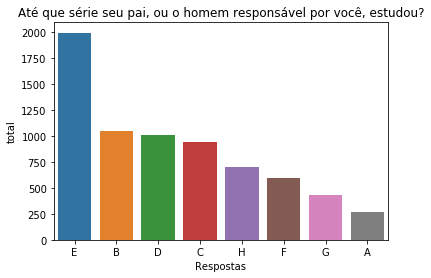

In [17]:
contagem_de_questionario = dadosEnem['Q001'].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem['Q001'].value_counts(normalize=True)

#contagem_de_questionario.head()
plt.title('Até que série seu pai, ou o homem responsável por você, estudou?')


sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


print(" A Nunca estudou. \n B Não completou a 4ª série/5º ano do Ensino Fundamental. \n C Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental. \n D Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio. \n E Completou o Ensino Médio, mas não completou a Faculdade. \n F Completou a Faculdade, mas não completou a Pós-graduação. \n G Completou a Pós-graduação. \n H Não sei.")






A Nunca estudou. 
 B Não completou a 4ª série/5º ano do Ensino Fundamental. 
 C Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental. 
 D Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio. 
 E Completou o Ensino Médio, mas não completou a Faculdade. 
 F Completou a Faculdade, mas não completou a Pós-graduação. 
 G Completou a Pós-graduação. 
 H Não sei.


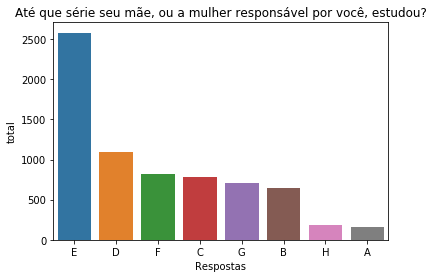

In [18]:
var = 'Q002'
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Até que série seu mãe, ou a mulher responsável por você, estudou?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


print("A Nunca estudou. \n B Não completou a 4ª série/5º ano do Ensino Fundamental. \n C Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental. \n D Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio. \n E Completou o Ensino Médio, mas não completou a Faculdade. \n F Completou a Faculdade, mas não completou a Pós-graduação. \n G Completou a Pós-graduação. \n H Não sei.")


#array = pd.DataFrame(dadosEnem[var].value_counts(normalize=True))
#array


 A) Grupo 1: Lavrador, agricultor sem empregados, boia-fria, criador de animais, apicultor, pescador, lenhador, seringueiro, extrativista.  
 B) Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria. 
 C) Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista. 
 D) Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, 

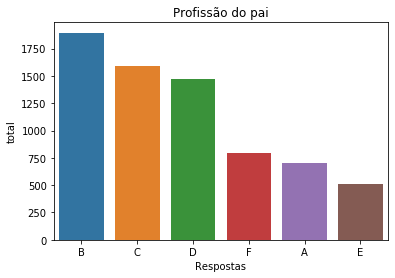

In [19]:
var = 'Q003'
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Profissão do pai')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


print(" A) Grupo 1: Lavrador, agricultor sem empregados, boia-fria, criador de animais, apicultor, pescador, lenhador, seringueiro, extrativista.  \n B) Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria. \n C) Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista. \n D) Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria. \n E)Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados. \n F) Não sei.")


#array = pd.DataFrame(dadosEnem[var].value_counts(normalize=True))
#array


 A) Grupo 1: Lavrador, agricultor sem empregados, boia-fria, criador de animais, apicultor, pescador, lenhador, seringueiro, extrativista.  
 B) Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria. 
 C) Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista. 
 D) Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, 

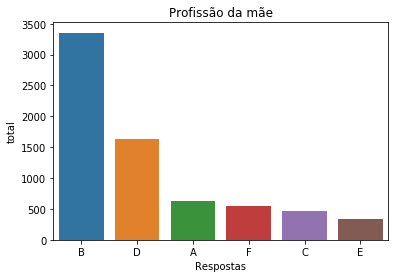

In [20]:
var = 'Q004'
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Profissão da mãe')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


print(" A) Grupo 1: Lavrador, agricultor sem empregados, boia-fria, criador de animais, apicultor, pescador, lenhador, seringueiro, extrativista.  \n B) Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria. \n C) Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista. \n D) Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria. \n E)Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados. \n F) Não sei.")


#array = pd.DataFrame(dadosEnem[var].value_counts(normalize=True))
#array


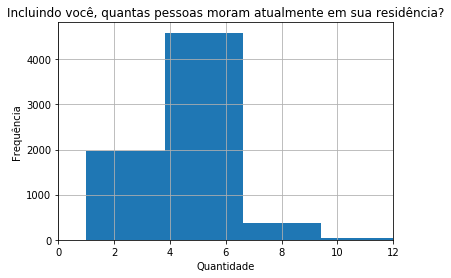

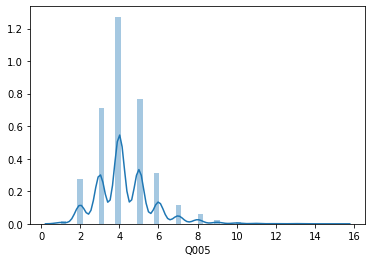

In [21]:
var = 'Q005'
df = dadosEnem[var]
hist = df.hist(bins=5)
hist.set_xlim((0,12))
plt.title('Incluindo você, quantas pessoas moram atualmente em sua residência?')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
hist
plt.show()

sns.distplot(df)



 A:Nenhuma renda. 
 B:Até R$ 937,00. 
 C:De R$ 937,01 até R$ 1.405,50. 
 D:De R$ 1.405,51 até R$ 1.874,00. 
 E:De R$ 1.874,01 até R$ 2.342,50. 
 F:De R$ 2.342,51 até R$ 2.811,00. 
 G:De R$ 2.811,01 até R$ 3.748,00. 
 H:De R$ 3.748,01 até R$ 4.685,00. 
 I:De R$ 4.685,01 até R$ 5.622,00. 
 J:De R$ 5.622,01 até R$ 6.559,00. 
 K:De R$ 6.559,01 até R$ 7.496,00. 
 L:De R$ 7.496,01 até R$ 8.433,00. 
 M:De R$ 8.433,01 até R$ 9.370,00. 
 N:De R$ 9.370,01 até R$ 11.244,00. 
 O:De R$ 11.244,01 até R$ 14.055,00. 
 P:De R$ 14.055,01 até R$ 18.740,00. 
 Q:Mais de R$ 18.740,00. 



,Q006,Porcentagem (%)
B,2324,33.323774
C,1686,24.175509
D,520,7.456266
E,448,6.423860
A,318,4.559794
G,303,4.344709
F,240,3.441354
H,226,3.240608
I,173,2.480642
Q,108,1.548609


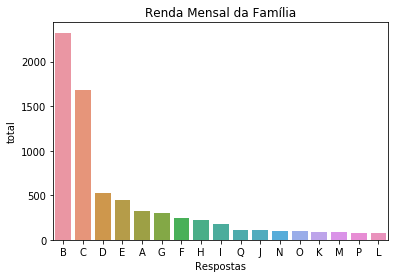

In [22]:
var = "Q006"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Renda Mensal da Família')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)

print(" A:Nenhuma renda. \n B:Até R$ 937,00. \n C:De R$ 937,01 até R$ 1.405,50. \n D:De R$ 1.405,51 até R$ 1.874,00. \n E:De R$ 1.874,01 até R$ 2.342,50. \n F:De R$ 2.342,51 até R$ 2.811,00. \n G:De R$ 2.811,01 até R$ 3.748,00. \n H:De R$ 3.748,01 até R$ 4.685,00. \n I:De R$ 4.685,01 até R$ 5.622,00. \n J:De R$ 5.622,01 até R$ 6.559,00. \n K:De R$ 6.559,01 até R$ 7.496,00. \n L:De R$ 7.496,01 até R$ 8.433,00. \n M:De R$ 8.433,01 até R$ 9.370,00. \n N:De R$ 9.370,01 até R$ 11.244,00. \n O:De R$ 11.244,01 até R$ 14.055,00. \n P:De R$ 14.055,01 até R$ 18.740,00. \n Q:Mais de R$ 18.740,00. \n" ) 

array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array


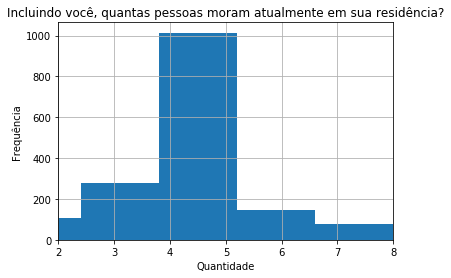

,Q005,Porcentagem (%)
4,2485,35.632349
5,1493,21.408087
3,1391,19.945512
6,609,8.732435
2,532,7.628334
7,223,3.197591
8,117,1.677660
9,43,0.616576
1,37,0.530542
10,23,0.329796


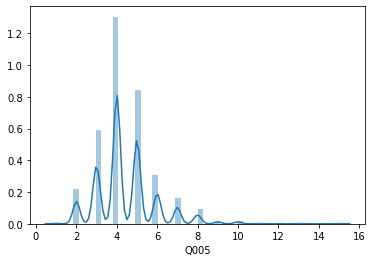

In [23]:
dados_C = dadosEnem.query("Q006 == 'C'")
var = 'Q005'
df = dados_C[var]
hist = df.hist()
hist.set_xlim((2,8))
plt.title('Incluindo você, quantas pessoas moram atualmente em sua residência?')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
hist
plt.show()

sns.distplot(df)

array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array




,Q007,Porcentagem (%)
A,6325,90.694006
D,328,4.703183
B,250,3.584743
C,71,1.018067


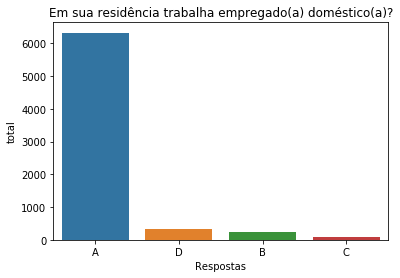

In [24]:
var = "Q007"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Em sua residência trabalha empregado(a) doméstico(a)?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array


,Q008,Porcentagem (%)
B,4653,66.719243
C,1479,21.207342
D,481,6.897046
E,312,4.473760
A,49,0.702610


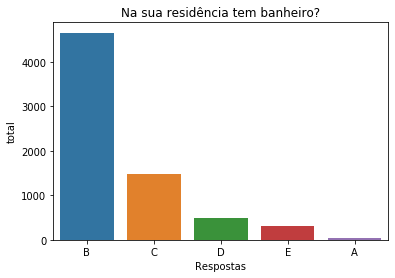

In [25]:
var = "Q008"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem banheiro?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array


,Q009,Porcentagem (%)
C,3621,51.921422
D,2274,32.606825
E,533,7.642673
B,527,7.556639
A,19,0.272440


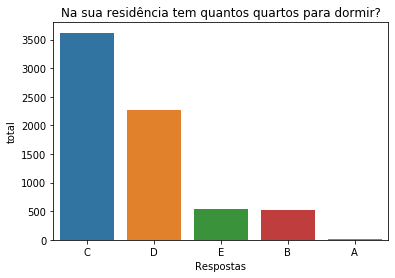

In [26]:
var = "Q009"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

,Q010,Porcentagem (%)
A,4252,60.969315
B,2116,30.341268
C,501,7.183826
D,84,1.204474
E,21,0.301118


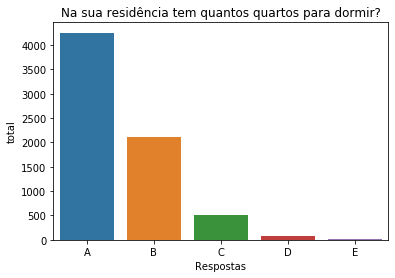

In [27]:
var = "Q010"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

,Q011,Porcentagem (%)
A,4924,70.605105
B,1888,27.071982
C,151,2.165185
D,8,0.114712
E,3,0.043017


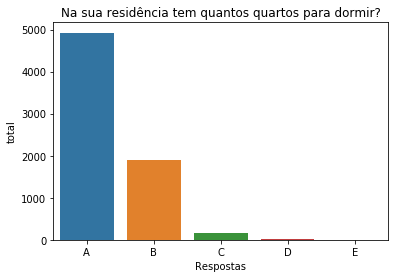

In [28]:
var = "Q011"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

,Q012,Porcentagem (%)
B,6586,94.436478
C,270,3.871523
A,85,1.218813
D,28,0.401491
E,5,0.071695


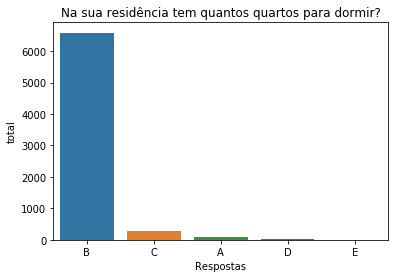

In [29]:
var = "Q012"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

,Q013,Porcentagem (%)
A,4865,69.759105
B,1927,27.631202
C,140,2.007456
D,35,0.501864
E,7,0.100373


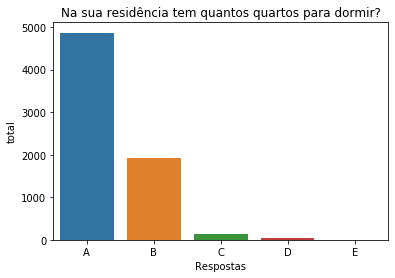

In [30]:
var = "Q013"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

,Q014,Porcentagem (%)
A,4074,58.416977
B,2878,41.267565
C,20,0.286779
D,1,0.014339
E,1,0.014339


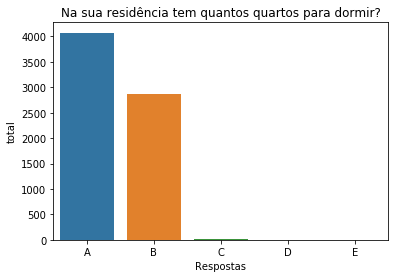

In [31]:
var = "Q014"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

,Q015,Porcentagem (%)
A,6560,94.063665
B,412,5.907657
C,2,0.028678


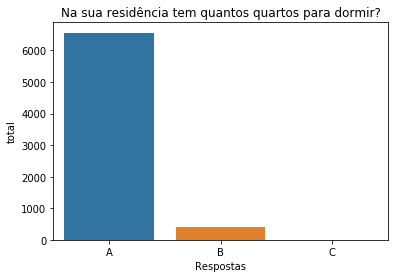

In [32]:
var = "Q015"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

,Q016,Porcentagem (%)
A,4453,63.851448
B,2498,35.818755
C,22,0.315457
D,1,0.014339


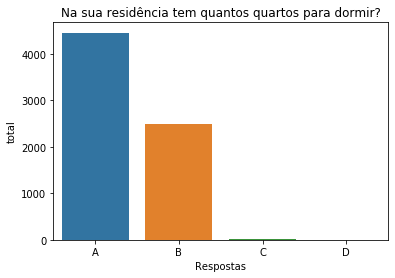

In [33]:
var = "Q016"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

,Q017,Porcentagem (%)
A,6895,98.867221
B,76,1.089762
C,2,0.028678
D,1,0.014339


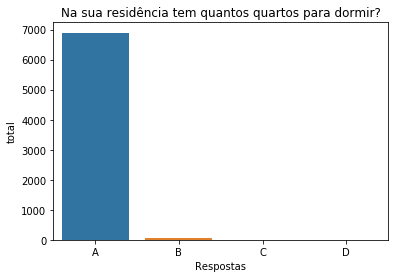

In [34]:
var = "Q017"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

,Q018,Porcentagem (%)
A,6515,93.418411
B,459,6.581589


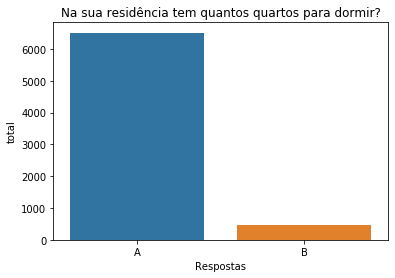

In [35]:
var = "Q018"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

,Q019,Porcentagem (%)
B,4780,68.540293
C,1300,18.640665
D,416,5.965013
E,261,3.742472
A,217,3.111557


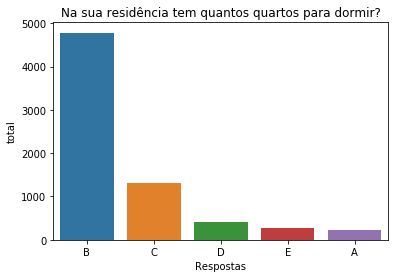

In [36]:
var = "Q019"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

,Q020,Porcentagem (%)
A,4730,67.823344
B,2244,32.176656


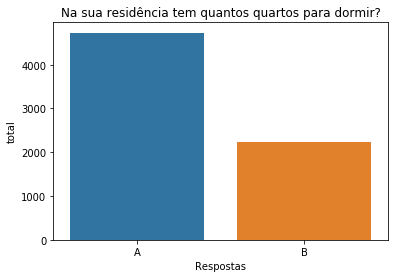

In [37]:
var = "Q020"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

,Q021,Porcentagem (%)
A,5740,82.305707
B,1234,17.694293


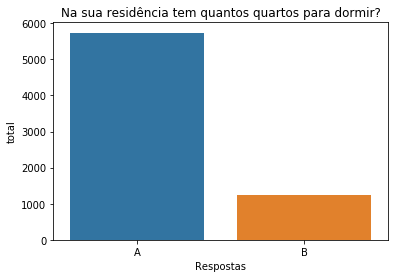

In [38]:
var = "Q021"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

,Q022,Porcentagem (%)
C,2098,30.083166
D,1939,27.803269
E,1602,22.971035
B,1235,17.708632
A,100,1.433897


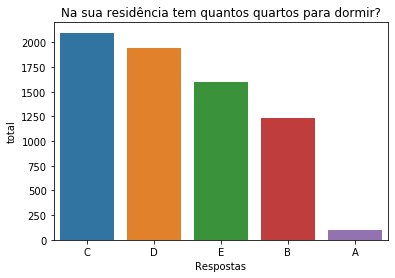

In [39]:
var = "Q022"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

,Q023,Porcentagem (%)
A,5750,82.449097
B,1224,17.550903


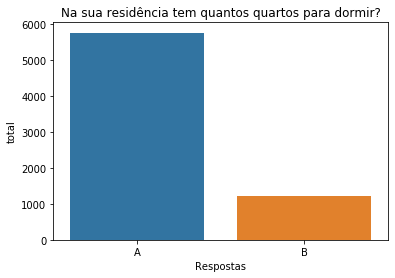

In [40]:
var = "Q023"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

,Q024,Porcentagem (%)
A,3866,55.434471
B,2407,34.513909
C,483,6.925724
D,164,2.351592
E,54,0.774305


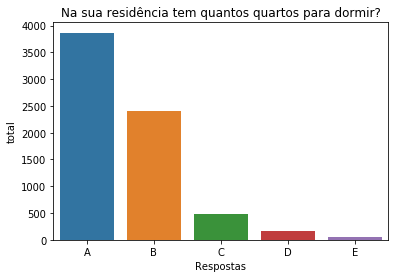

In [41]:
var = "Q024"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

,Q025,Porcentagem (%)
B,5060,72.555205
A,1914,27.444795


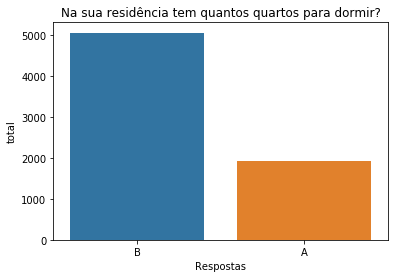

In [42]:
var = "Q025"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

In [43]:
var = "Q026"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

KeyError: 'Q026'

In [ ]:
contagem_de_questionario = dadosEnem['Q001'].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem['Q001'].value_counts(normalize=True)

#contagem_de_questionario.head()
plt.title('Até que série seu pai, ou o homem responsável por você, estudou?')


sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


print(" A Nunca estudou. \n B Não completou a 4ª série/5º ano do Ensino Fundamental. \n C Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental. \n D Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio. \n E Completou o Ensino Médio, mas não completou a Faculdade. \n F Completou a Faculdade, mas não completou a Pós-graduação. \n G Completou a Pós-graduação. \n H Não sei.")






In [ ]:
var = 'Q002'
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Até que série seu mãe, ou a mulher responsável por você, estudou?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


print("A Nunca estudou. \n B Não completou a 4ª série/5º ano do Ensino Fundamental. \n C Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental. \n D Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio. \n E Completou o Ensino Médio, mas não completou a Faculdade. \n F Completou a Faculdade, mas não completou a Pós-graduação. \n G Completou a Pós-graduação. \n H Não sei.")


#array = pd.DataFrame(dadosEnem[var].value_counts(normalize=True))
#array


In [ ]:
var = 'Q003'
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Profissão do pai')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


print(" A) Grupo 1: Lavrador, agricultor sem empregados, boia-fria, criador de animais, apicultor, pescador, lenhador, seringueiro, extrativista.  \n B) Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria. \n C) Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista. \n D) Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria. \n E)Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados. \n F) Não sei.")


#array = pd.DataFrame(dadosEnem[var].value_counts(normalize=True))
#array


In [ ]:
var = 'Q004'
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Profissão da mãe')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


print(" A) Grupo 1: Lavrador, agricultor sem empregados, boia-fria, criador de animais, apicultor, pescador, lenhador, seringueiro, extrativista.  \n B) Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria. \n C) Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista. \n D) Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria. \n E)Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados. \n F) Não sei.")


#array = pd.DataFrame(dadosEnem[var].value_counts(normalize=True))
#array


In [ ]:
var = 'Q005'
df = dadosEnem[var]
hist = df.hist(bins=5)
hist.set_xlim((0,12))
plt.title('Incluindo você, quantas pessoas moram atualmente em sua residência?')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
hist
plt.show()

sns.distplot(df)



In [ ]:
var = "Q006"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Renda Mensal da Família')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)

print(" A:Nenhuma renda. \n B:Até R$ 937,00. \n C:De R$ 937,01 até R$ 1.405,50. \n D:De R$ 1.405,51 até R$ 1.874,00. \n E:De R$ 1.874,01 até R$ 2.342,50. \n F:De R$ 2.342,51 até R$ 2.811,00. \n G:De R$ 2.811,01 até R$ 3.748,00. \n H:De R$ 3.748,01 até R$ 4.685,00. \n I:De R$ 4.685,01 até R$ 5.622,00. \n J:De R$ 5.622,01 até R$ 6.559,00. \n K:De R$ 6.559,01 até R$ 7.496,00. \n L:De R$ 7.496,01 até R$ 8.433,00. \n M:De R$ 8.433,01 até R$ 9.370,00. \n N:De R$ 9.370,01 até R$ 11.244,00. \n O:De R$ 11.244,01 até R$ 14.055,00. \n P:De R$ 14.055,01 até R$ 18.740,00. \n Q:Mais de R$ 18.740,00. \n" ) 

array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array


In [ ]:
dados_C = dadosEnem.query("Q006 == 'C'")
var = 'Q005'
df = dados_C[var]
hist = df.hist()
hist.set_xlim((2,8))
plt.title('Incluindo você, quantas pessoas moram atualmente em sua residência?')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
hist
plt.show()

sns.distplot(df)

array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array




In [ ]:
var = "Q007"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Em sua residência trabalha empregado(a) doméstico(a)?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array


In [ ]:
var = "Q008"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem banheiro?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array


In [ ]:
var = "Q009"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

In [ ]:
var = "Q010"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

In [ ]:
var = "Q011"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

In [ ]:
var = "Q012"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

In [ ]:
var = "Q013"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

In [ ]:
var = "Q014"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

In [ ]:
var = "Q015"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

In [ ]:
var = "Q016"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

In [ ]:
var = "Q017"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

In [ ]:
var = "Q018"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

In [ ]:
var = "Q019"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

In [ ]:
var = "Q020"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

In [ ]:
var = "Q021"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

In [ ]:
var = "Q022"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

In [ ]:
var = "Q023"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

In [ ]:
var = "Q024"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

In [ ]:
var = "Q025"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

In [ ]:
var = "Q026"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Na sua residência tem quantos quartos para dormir?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100)
array['Porcentagem (%)'] = array2
array

# O que foi feito?



1.   Análise das bases de dados públicas e ficou decidido que inicialmente iriamos focar nos dados do Enem de Minas Gerais.
2.   Análise exploratória dos dados do Enem 2017 ( Microdados_Enem_Aluno e Microdados_Enem_Escola)
3.   Busca sobre trabalhos relacionados a clusterização e trabalhos sobre mineração de dados do enem
4.  Surgiu a intenção de relacionar os alunos com a proximidade à Instituições de Ensino Superior Públicas (IESP) e enriquecer a base com dados das cidades de MG.
5. Para saber quais cidades possuiam um IESP o Stênio forneceu uma base. Entretanto, essa base não incluia todos os Campi das IESP, acredito eu só tinha as sedes das instituições. Para conseguir quais cidades possuiam um Campus de uma IESP fui na base do Enade.
6. Para saber mais informações da cidades tenho duas bases:
 uma mais simples que tem a estimativa da população e alguns dados
    1. Estimativas de população enviadas ao TCU (DTB_MG_POP)
    1. PIB dos Munícipios (DTB_MG_PIB) 


    #Datasets

|          Nome          | Fonte |  Ano |                        Observações                        | Linhas | Colunas |
|:----------------------:|:-----:|:----:|:---------------------------------------------------------:|:------:|:-------:|
|  Microdados_Enem_Aluno |  Inep | 2017 |        Algumas Colunas Foram retiradas da Original        | 177552 |    67   |
| Microdados_Enem_Escola |  Inep | 2017 |        Algumas Colunas Foram retiradas da Original        |  1185  |    27   |
|       DTB_MG_POP       |  IBGE | 2017 | Adicionada coluna possui_IESP a partir da base Enade 2017 |   854  |    9    |
|       DTB_MG_PIB       |  IBGE | 2017 |      Falta limpar algumas colunas "estranhas" da base     |   854  |    83   |

